<table align="center" width=100%>
    <tr>
        <td width="10%">
            <img src="">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Fake and Real News Detection
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

The problem of fake and real news detection is to develop an automated system that can distinguish between genuine news articles and fake news articles. With the rise of social media and the internet, fake news has become a significant issue that can have far-reaching consequences. Fake news can cause confusion, influence public opinion, and even have political implications.

The problem of fake and real news detection involves building a model that can automatically identify features that distinguish genuine news articles from fake ones. The model is trained on a dataset of labeled news articles, where each article is labeled as either real or fake. The model is then tested on a separate set of articles to evaluate its accuracy.



## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Visualizing text and ploting word cloud](#visualize_ids)**
3. **[Data Analysis](#data_analysis)**

    - 3.1 - Cleaning Data
    - 3.2 - Bag of Words
    - 3.3 - MultinomialNB Algorithm
    - 3.4 - TF-IDF
	- 3.5 - word vectorization
	- 3.6 -	word2 vec
    - 3.7 - Stemming
    - 3.8 - Tokenization
    


### **Importing Libraries**

In [1]:
# # To mount the google drive

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Importing the libraries

import numpy as np             # numpy is a numerical python used to work with array
import pandas as pd            # pandas is used for data manipulation
import matplotlib.pyplot as plt       # matplotlib used for visualization
import seaborn as sns                 # seaborn is used for visualization purpose built top of matplotlib
import nltk            # Natural Language Tool Kit used to process the data in human spoken language (it allows us to apply different kind of technique such as parsing,tokenization,lemmatization,stemming etc)
import re                   # regular expression for string manipulations
from wordcloud import WordCloud       # Text visualization python package

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer  # tokenization is used to split a paragraph or entire text in to smaller units, this smaller units are called as tokens, it is used to get the individual words (it is used to count the number of words in a sentence and it helps to interpret the meaning of the text by analyzing the word present in a text)
from tensorflow.keras.preprocessing.sequence import pad_sequences     # pad_sequences is used to ensure that all sequences in a list have the same length.
from tensorflow.keras.models import Sequential                        # The deep learning model is created layer by layer so we are using sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM   # Dense Layer is a simple layer of neurons in which each neurons recives input from all the neurons of previous layer,  Embedding is a technique which converts word into vector
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score


**Loading the dataset**

In [4]:
fake=pd.read_csv(r"C:\Users\ASHISH PAL\Downloads\Fake.csv")
real=pd.read_csv(r"C:\Users\ASHISH PAL\Downloads\True.csv")

In [5]:
fake.shape

(23481, 4)

In [6]:
real.shape

(21417, 4)

In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [9]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [10]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

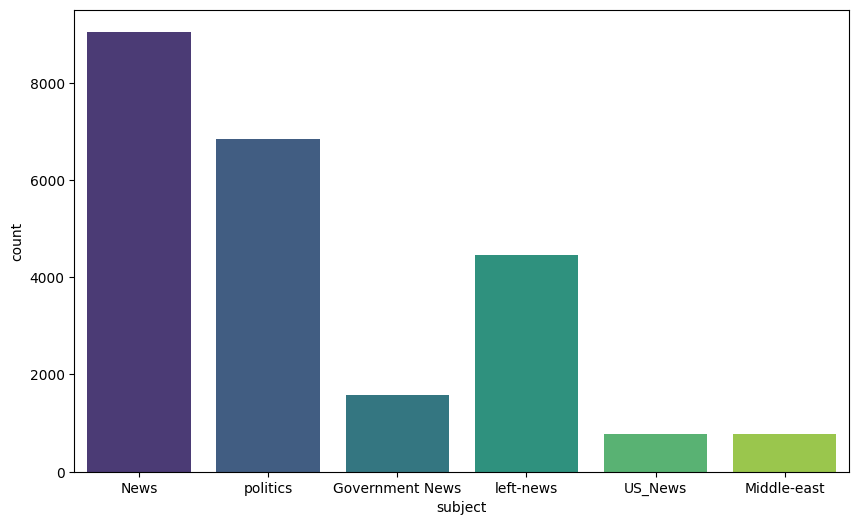

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=fake.subject,palette='viridis')
plt.show();

# word cloud

In [12]:
type(fake.text)

pandas.core.series.Series

In [13]:
# now will mix all the text data together
text=' '.join(fake['text'].tolist())             # the fake.text was in series we are going to convert into list and then we are joining in to a single sentence

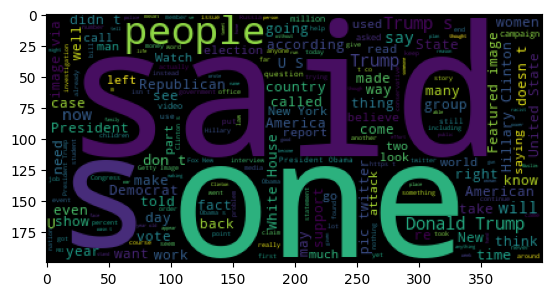

In [14]:
# printing the wordcloud of fake text data
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)

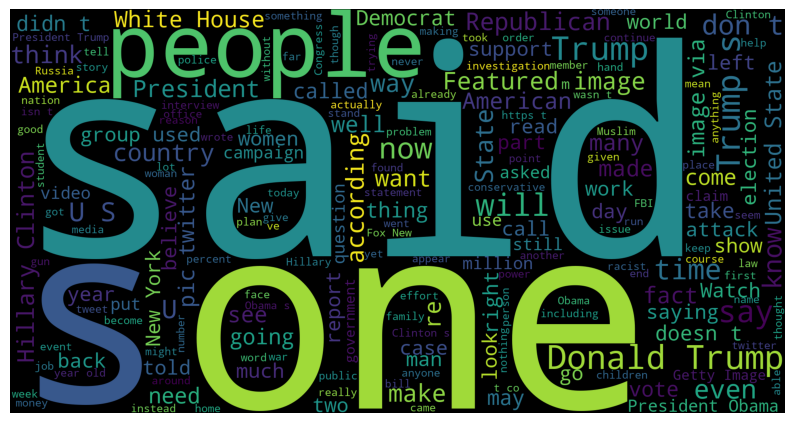

In [16]:
# will plot the same in clear format by increasing the size of the image
wordcloud=WordCloud(width=1920,height=1000).generate(text)          # we are using wordcloud to visualize more frequent word present in the sentence
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')             # to swith off the axis
plt.show()

Will plot the word plot for real news

In [17]:
text=' '.join(real['text'].tolist())

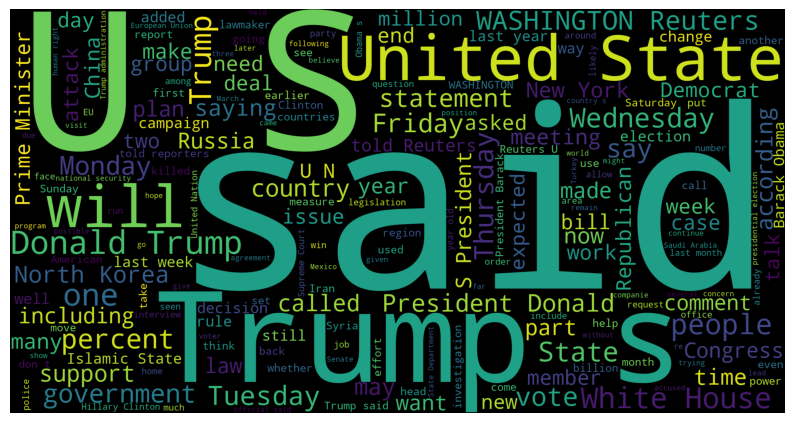

In [18]:
# will plot the same in clear format by increasing the size of the image
wordcloud=WordCloud(width=1920,height=1000).generate(text)          # we are using wordcloud to visualize more frequent word present in the sentence
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')             # to swith off the axis
plt.show()

you can see both fake and real wordcloud are same but in real wordcloud you can see that 'white house' and 'washington reuters' are repeated most of the time in real news

If it is real news then their will be reference to the publications

Difference in Text

Real news seems to have source of publication which is not present in fake news set
Looking at the Data:



*   Most of text contains reuters information such as **washington (Reuters)**
*   Some text are tweets from Twitter
*   Few text do not contain any publication info



# Cleaning Data

## Removing Reuters or Twitter Tweet Information from the text

  *  Text can be splitted only once at "**-**" which is always present after mentioning source of publication, this gives us publication part and text part
  *  If we do not get text part, this means publication details was'nt given for the record
  *  The Twitter tweets always have same source, a long text of max 120 characters



In [19]:
real.text[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [20]:
# Now will create list of indexes which donot have publication information (performing exception handling)

unknown_publishers=[]
for index,row in enumerate(real.text.values):
  try:
    record=row.split('-',maxsplit=1)         # this code is a critical statement so i dont want to stop the execution if i get the error so i am using try
    assert(len(record[0])<120)               # we declares a condition to be true using assert statement prior to running the module
  except:
    unknown_publishers.append(index)

In [21]:
# For example how exception handling works
a=5
b=0
try:
  print(a/b)
except:
  print('you cannot divide a number by 0')

you cannot divide a number by 0


In [22]:
len(unknown_publishers)

221

In [23]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 221, dtype: object

In [24]:
# Checking for missing values
real.text[real.text==' ']

8970     
Name: text, dtype: object

In [25]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [26]:
# Droping the missing values
real= real.drop(8970,axis=0)

In [27]:
# Spliting the publisher info and text if publishers info is not exist we are filling with unknown publisher
publisher = []
tmp_text = []

for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record=row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [28]:
real['publisher']=publisher
real['text']=tmp_text

In [29]:
np.array(publisher).shape

(21416,)

In [30]:
# will check if their is any empty text present in the real data
[index  for index,text in enumerate(real.text.tolist()) if str(text).strip()=='']

[]

In [31]:
# will check if their is any empty text present in the fake data
empty_fake_index=[index  for index,text in enumerate(fake.text.tolist()) if str(text).strip()=='']

In [32]:
len(empty_fake_index)

630

In [33]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [34]:
# we are adding title and text to gether to the text column
real['text']=real['title'] + ' '+ real['text']
fake['text']=fake['title']+' '+fake['text']

Preprocessing Text

In [35]:
real['class']= 1
fake['class']=0

In [36]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [37]:
real=real[['text','class']]
fake=fake[['text','class']]

In [38]:
real

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,1
21413,LexisNexis withdrew two products from Chinese ...,1
21414,Minsk cultural hub becomes haven from authorit...,1
21415,Vatican upbeat on possibility of Pope Francis ...,1


In [39]:
data=pd.concat([real,fake],axis=0)

In [40]:
data.sample(5)

,text,class
11121,Confident Trump says could 'shoot somebody' an...,1
8430,"Hackers targeted Trump campaign, Republican Pa...",1
4315,"Trump Still Racist As Ever, Continues To Accu...",0
14906,"Russia, U.S. stalemate over Syria chemical wea...",1
1897,"Trump defends DACA move, urges Congress to ena...",1


Text Cleaning

In [41]:
## Now will remove all the special character in the data for example
re.sub('[^A-Za-z0-9 ]', '', 'this ,. @ is # gre@t')      # by using regression expression substituting (which are all not in A-Za-z0-9)

'this   is  gret'

In [42]:
data.text.head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: text, dtype: object

In [43]:
message=data.text.to_list()
message[0]

'As U.S. budget fight looms, Republicans flip their fiscal script The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary

In [44]:
len(message)

44897

In [45]:
# Dataset Preprocessing and applying stemming

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
ps = PorterStemmer()
stop_words_lis= stopwords.words('english')
stop_words_lis.remove('not')
corpus = []
for i in range(0,len(message)):
  review = re.sub('[^a-zA-Z]',' ',message[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stop_words_lis]
  reveiw = ' '.join(review)
  corpus.append(reveiw)

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     PAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
corpus[0]

'u budget fight loom republican flip fiscal script head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say not enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meadow among

In [48]:
data.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


Applying Countvectorizer

Creating the Bag of Words Model

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [50]:
y=data['class']

In [51]:

## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()


count_df = pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [53]:
count_df.head()

,abadi,abandon,abba,abc,abc news,abdullah,abe,abedin,abid,abil,...,youtub,youtub com,youtub com watch,zealand,zero,zika,zimbabw,zone,zor,zuma
0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MultinomialNB Algorithm

In [54]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [55]:
from sklearn import metrics
import numpy as np
import itertools

In [56]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print('accuracy =',score)

accuracy = 0.954849159748937


In [57]:
confusion_matrix(y_test,pred)

array([[7468,  316],
       [ 353, 6680]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

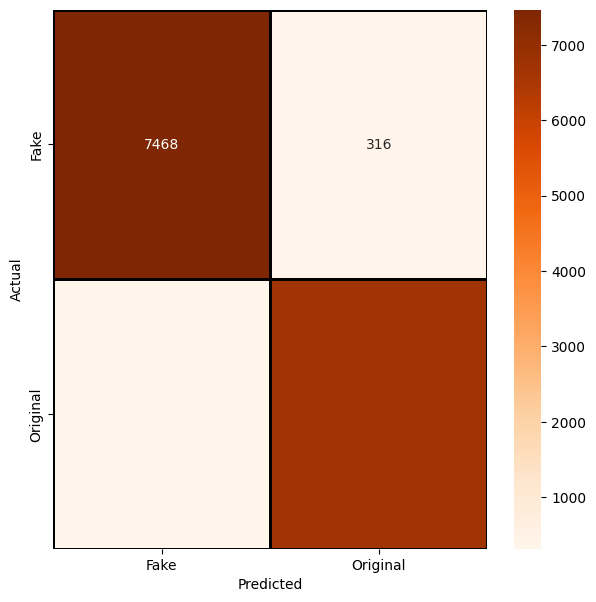

In [58]:
cm = confusion_matrix(y_test,pred)
cm = pd .DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])
plt.figure(figsize = (7,7))
sns.heatmap(cm,cmap= "Oranges", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Multinomial Classifier with Hyperparameter



In [59]:
classifier=MultinomialNB(alpha=0.1)

In [60]:
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred=sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score>previous_score:
    print(f'alpha : {alpha} score : {score}')

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


alpha : 0.0 score : 0.525342511979483
alpha : 0.1 score : 0.9557265303367753
alpha : 0.2 score : 0.9555915502463387
alpha : 0.30000000000000004 score : 0.9553215900654654
alpha : 0.4 score : 0.955254100020247
alpha : 0.5 score : 0.955254100020247
alpha : 0.6000000000000001 score : 0.955051629884592
alpha : 0.7000000000000001 score : 0.9549841398393737
alpha : 0.8 score : 0.9549841398393737
alpha : 0.9 score : 0.954849159748937


# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

In [ ]:
y=data['class']

In [ ]:
# Dividing the dataset into Train and Teset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
tfidf_v.get_feature_names()[:10]

In [ ]:
# To see how the vector is formed by using TFIDF
count_df = pd.DataFrame(X_train,columns=tfidf_v.get_feature_names())

In [ ]:
count_df.head()

MultinomialNB Algorithm

In [ ]:
classifier=MultinomialNB()

In [ ]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print('accuracy =',score)

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm = pd .DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])
plt.figure(figsize = (7,7))
sns.heatmap(cm,cmap= "Oranges", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Multinomial Classifier with Hyperparameter



In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred=sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score>previous_score:
    print(f'alpha : {alpha} score : {score}')

# Now we want to convert this text data to vectorization so we will be using Word2vec

![image.png](attachment:image.png)

# Vectorization -- Word2Vec

## Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

## word embedding is the most popular representation of document vocabulary. It is capable of capturing context of word in a document, semantic and syntatic similarity, relation with other words, etc

In [130]:
y=data['class'].values

In [131]:
# Now will convert the text in list of list
# X=[i.split() for i in data['text'].tolist()]

In [132]:
x=[i.split()  for i in corpus]

In [133]:
print(x[0])

['u', 'budget', 'fight', 'loom', 'republican', 'flip', 'fiscal', 'script', 'head', 'conserv', 'republican', 'faction', 'u', 'congress', 'vote', 'month', 'huge', 'expans', 'nation', 'debt', 'pay', 'tax', 'cut', 'call', 'fiscal', 'conserv', 'sunday', 'urg', 'budget', 'restraint', 'keep', 'sharp', 'pivot', 'way', 'among', 'republican', 'u', 'repres', 'mark', 'meadow', 'speak', 'cb', 'face', 'nation', 'drew', 'hard', 'line', 'feder', 'spend', 'lawmak', 'brace', 'battl', 'januari', 'return', 'holiday', 'wednesday', 'lawmak', 'begin', 'tri', 'pass', 'feder', 'budget', 'fight', 'like', 'link', 'issu', 'immigr', 'polici', 'even', 'novemb', 'congression', 'elect', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'presid', 'donald', 'trump', 'republican', 'want', 'big', 'budget', 'increas', 'militari', 'spend', 'democrat', 'also', 'want', 'proport', 'increas', 'non', 'defens', 'discretionari', 'spend', 'program', 'support', 'educ', 'scientif', 'research', 'infrastruct

In [134]:
# print(X[0])

In [137]:
len(x[0])

449

In [149]:
DIM=100
w2v_model = gensim.models.Word2Vec(sentences=x,size=DIM,window=11)    # here we are going to make 11 seperate window(group) and if their is only 1 data at the last we must convert it in to vector

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Lib\site-packages\gensim\matutils.py", line 1356, in <module>
    from gensim.corpora._mmreader import MmReader  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "gensim\corpora\_mmreader.pyx", line 11, in init gensim.corpora._mmreader
ImportError: cannot import name utils

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ASHISH PAL\AppData\Local\Temp\ipykernel_175376\2337149043.py", line 1, in <module>
    import gensim
  File "C:\ProgramData\Anaconda3\Lib\site-packages\gensim\__init__.py", line 11, in <module>
    from gensim import parsing, corpora, matutils, interfaces, models, similarities, utils  # noqa:F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [144]:
# Now will check the most similar word in our model  this is with the help of gensim
w2v_model.wv.most_similar('india')

NameError: name 'w2v_model' is not defined

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
X=tokenizer.texts_to_sequences(x)

In [ ]:
#tokenizer.word_index

In [ ]:
 plt.hist([len(i) for i in x],bins=800)
 plt.show()

Most of the list contains between 300 to 500 words

In [ ]:
# now will will print the index which have more than 600 words in the list
nos=np.array([len(i) for i in x])
len(nos[nos>600])                    # we have 1497 sentences which have more than 600 words

### Now will make some changes which ever sentences having greater than 600 words will be limited to 600 words and which ever sentences is less than 600 words will do padding and fill 0 at the initial stage and make the size =600

In [ ]:
maxlen=600
X=pad_sequences(X,maxlen=maxlen)

In [ ]:
# Now will check the size of the sentences randomly
X[1021].size

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size,DIM))

  for word,i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
# Now will do train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(X_train[0:5])
print(y_train[0:5])

In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)


In [ ]:
y_pred=(model.predict(X_test) >=0.5).astype(int)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm = pd .DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [ ]:
plt.figure(figsize = (7,7))
sns.heatmap(cm,cmap= "Oranges", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.figure(figsize = (20,5))
    plt.plot(fpr,tpr, color = 'green')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

fpr , tpr , thresholds = roc_curve (y_test , y_pred)
plot_roc_curve(fpr,tpr)

In [ ]:
# Now will write a function that takes a input news and predict if the news is fake or original

def predicting_news(a):
    new_data=tokenizer.texts_to_sequences(a)
    new_data=pad_sequences(new_data,maxlen=maxlen)
    output=(model.predict(new_data) >=0.5).astype(int)
    if output >0.5:
        print('The Given News is Real')
    else:
        print('The Given News is Fake')


In [ ]:
a=["Russia Ukraine War Crisis Live Updates, July 02, 2022: As reported by Reuters, the Ambassador to Russia of the pro-Moscow self-styled Luhansk People's Republic, Rodion Miroshnik, told Russian television Lysychansk has been brought under control."]
predicting_news(a)

In [ ]:
# https://www.statista.com/topics/5846/fake-news-in-india/#dossierKeyfigures  for fake news artical
a=['In a post-truth era, the contagion of fake news has gripped the world in equal parts. Right from the United states of America, to emerging economies like India, Brazil and others, no one seems to be spared. Deeply interlinked with technological developments, “disinformation” and “misinformation” have become pervasive in our news bubbles. As the world’s largest democracy with the second largest population, the issue of fake news poses a unique threat in India. Not only do the low literacy rates make it hard to implement the true spirit of democratic decision-making, but add to that an explosion of fake news and divisive propaganda, and there looms a real threat to the country’s democratic fabric itself.']
predicting_news(a)

In [ ]:
a=["India logged 16,103 new coronavirus infections taking the total tally of COVID-19 cases to 4,35,02,429, while the active cases increased to 1,11,711, according to the Union Health Ministry data updated on Sunday"]
predicting_news(a)

In [ ]:
# https://www.statista.com/statistics/1027070/india-responsibility-to-solve-misinformation-problem/
a=['About 51 percent of the survey respondents agreed that they are concerned when facts were spun or twisted to push a particular agenda through fake news media. Fake news and disinformation through social media has been a pressing issue in many countries across the world today. In India as well, this concern was reflected in good measure with a majority of the respondents stating they were worried about fake news being a problem due to various reasons.']
predicting_news(a)